In [29]:
from qutip import *
from custermized_qip.device import DispersiveCavityQED
from custermized_qip.device import Circuit_QED
from custermized_qip.circuit import QubitCircuit
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def test_swap_fidelity(t1=10,t2=10):
    circuit = QubitCircuit(2)
    circuit.add_gate("ISWAP", targets=[0,1])
    qubit_state1=rand_ket(2)
    qubit_state2=rand_ket(2)
    initial_state=tensor(basis(10,0),qubit_state1,qubit_state2)
    # 定义一个processor
    processor = Circuit_QED(2,t1=t1,t2=t2)
    # 加载circuit
    processor.load_circuit(circuit)
    # 计算得到final state （初始值为零态）
    final_state = processor.run_state(initial_state, options=Options(nsteps=10000)).states[-1]
    final_state= final_state.ptrace([1,2])
    goal_state=iswap()*tensor(qubit_state1,qubit_state2)
    return fidelity(final_state,goal_state)

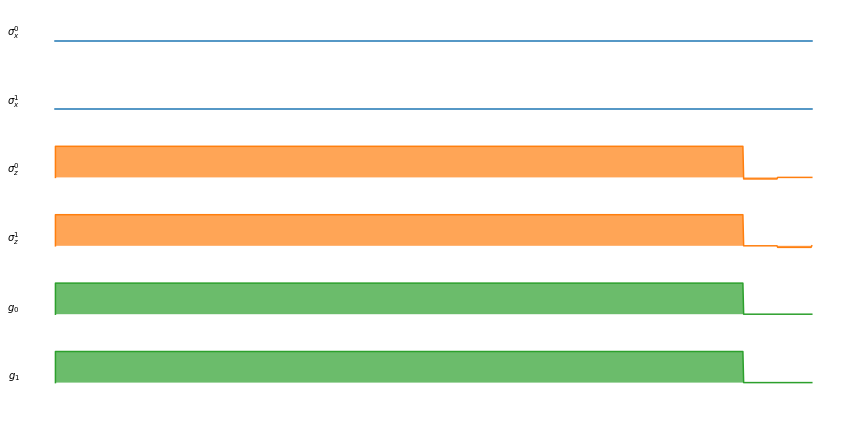

In [4]:
circuit = QubitCircuit(2)
circuit.add_gate("ISWAP", targets=[0,1])
qubit_state1=rand_ket(2)
qubit_state2=rand_ket(2)
initial_state=tensor(basis(10,0),qubit_state1,qubit_state2)
# 定义一个processor
processor = Circuit_QED(2,t1=10,t2=10)
# 加载circuit
processor.load_circuit(circuit)
# 计算得到final state （初始值为零态）
final_state = processor.run_state(initial_state, options=Options(nsteps=10000)).states[-1]
# 画pulse图
fig, ax = processor.plot_pulses()
fig.show()

In [5]:
final_state= final_state.ptrace([1,2])

In [6]:
goal_state=iswap()*tensor(qubit_state1,qubit_state2)

ipykernel_launcher:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit



In [7]:
fidelity(final_state,goal_state)

0.996061160022714

In [9]:
fidelity_error_list=[]
for i in range(1000):
    fidelity_error=1-test_swap_fidelity(t1=10,t2=10)
    fidelity_error_list.append(fidelity_error)
    if i % 100==0:
        print(str(i)+'is done')

he qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

ipykernel_launcher:14: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

ipykernel_launcher:14: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

ipykernel_launcher:14: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circ

Text(0, 0.5, 'counts')

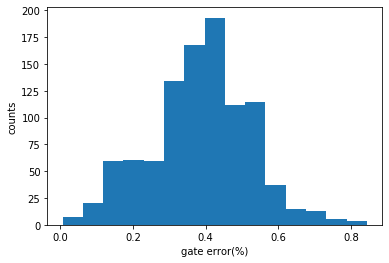

In [35]:
plt.hist(np.array(fidelity_error_list)*100, bins=15)
plt.xlabel('gate error(%)')
plt.ylabel('counts')

In [36]:
np.average(fidelity_error_list)

0.0038664880002538897

In [38]:
np.savetxt('fidelity_error_list.csv', fidelity_error_list, delimiter=',')